In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from google.colab import drive


In [9]:
# Mount your Google Drive
drive.mount('/content/drive')

# Get the path to your CSV file
csv_path = '/content/drive/MyDrive/MIA/2doSemestre/Analitica/talleresInd/datos_bono.csv'

# Check if the file exists
if os.path.exists(csv_path):
  data = pd.read_csv(csv_path)

  # Print the data
  print(data)
else:
  print("The file does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889

In [11]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Eliminación de columnas no necesarias
data_clean = data.drop('Unnamed: 0', axis=1)

# Verificación de valores nulos
null_counts = data_clean.isnull().sum()
print("Valores nulos en cada columna:\n", null_counts)


Valores nulos en cada columna:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [16]:
# Escalado de características: estandarización
scaler = StandardScaler()
features = data_clean.drop('medv', axis=1)  # Excluyendo la variable objetivo
target = data_clean['medv']
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [17]:
# Separación de los datos en conjuntos de entrenamiento y prueba
X_rm = features_scaled_df[['rm']]  # Característica para regresión simple
X_multi = features_scaled_df       # Todas las características para regresión múltiple
y = target

X_train_rm, X_test_rm, y_train, y_test = train_test_split(X_rm, y, test_size=0.2, random_state=1)
X_train_multi, X_test_multi, _, _ = train_test_split(X_multi, y, test_size=0.2, random_state=1)



In [18]:
# Creación y entrenamiento de modelos
model_simple = LinearRegression()
model_multi = LinearRegression()
model_ridge = Ridge(alpha=1.0)
model_elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

model_simple.fit(X_train_rm, y_train)
model_multi.fit(X_train_multi, y_train)
model_ridge.fit(X_train_multi, y_train)
model_elastic_net.fit(X_train_multi, y_train)



ElasticNet()

In [19]:
# Predicciones
y_pred_simple = model_simple.predict(X_test_rm)
y_pred_multi = model_multi.predict(X_test_multi)
y_pred_ridge = model_ridge.predict(X_test_multi)
y_pred_elastic_net = model_elastic_net.predict(X_test_multi)



In [20]:
# Evaluación de los modelos
mse_simple = mean_squared_error(y_test, y_pred_simple)
mse_multi = mean_squared_error(y_test, y_pred_multi)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

r2_simple = r2_score(y_test, y_pred_simple)
r2_multi = r2_score(y_test, y_pred_multi)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"Simple Linear Regression MSE: {mse_simple:.2f}, R2: {r2_simple:.2f}")
print(f"Multiple Linear Regression MSE: {mse_multi:.2f}, R2: {r2_multi:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Elastic Net Regression MSE: {mse_elastic_net:.2f}, R2: {r2_elastic_net:.2f}")



Simple Linear Regression MSE: 40.74, R2: 0.59
Multiple Linear Regression MSE: 23.38, R2: 0.76
Ridge Regression MSE: 23.38, R2: 0.76
Elastic Net Regression MSE: 36.84, R2: 0.63


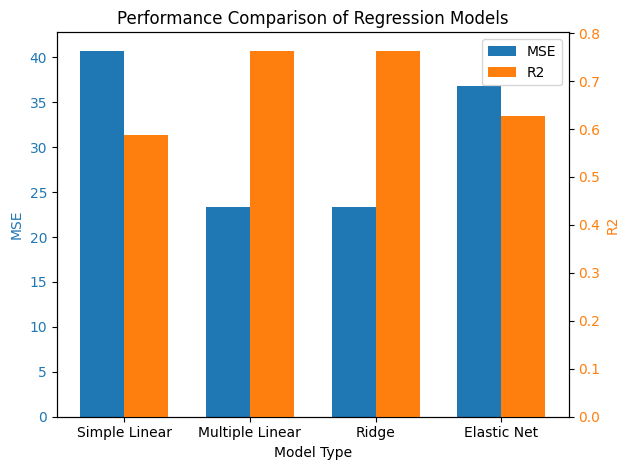

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Datos para la gráfica
model_names = ['Simple Linear', 'Multiple Linear', 'Ridge', 'Elastic Net']
mse_values = [mse_simple, mse_multi, mse_ridge, mse_elastic_net]
r2_values = [r2_simple, r2_multi, r2_ridge, r2_elastic_net]

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Barras para MSE
rects1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='tab:blue')

# Crear un segundo eje Y para los valores de R2
ax2 = ax1.twinx()
# Barras para R2
rects2 = ax2.bar(x + width/2, r2_values, width, label='R2', color='tab:orange')

# Añadiendo textos y etiquetas
ax1.set_xlabel('Model Type')
ax1.set_ylabel('MSE', color='tab:blue')
ax2.set_ylabel('R2', color='tab:orange')
ax1.set_title('Performance Comparison of Regression Models')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Añadiendo leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.tight_layout()  # Para ajustar layout y evitar solapamientos

plt.show()


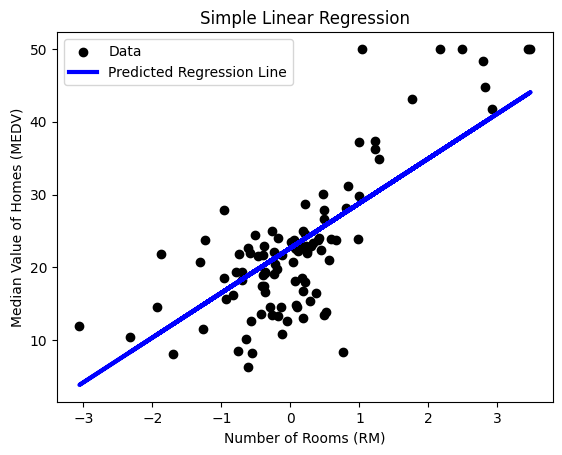

In [21]:
# Visualización de resultados para regresión simple
plt.scatter(X_test_rm, y_test, color='black', label='Data')
plt.plot(X_test_rm, y_pred_simple, color='blue', linewidth=3, label='Predicted Regression Line')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()